In [3]:
import sys
import os

notebook_dir = os.path.abspath('')

project_root = os.path.dirname(notebook_dir)

if project_root not in sys.path:
    print(f"Adding {project_root} to sys.path")
    sys.path.append(project_root)

Adding C:\Users\abcde\Downloads\GitHub\XFormers-Alpha to sys.path


In [10]:
from xformers_alpha.data.loaders import load_yfinance, load_universe
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [15]:
import mplfinance as mpf

In [7]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 100)

# Define a list of tickers for our universe
universe_tickers = ['META', 'AMZN', 'NFLX', 'GOOGL']
start_date = '2024-01-01'
end_date = '2024-04-01'

In [9]:
# Define the ticker, date range, and a 1-hour interval
ticker = 'NVDA'
start_date = '2024-03-04'
end_date = '2024-03-09'
interval = '1h'

print(f"Downloading {interval} data for {ticker} from {start_date} to {end_date}...")
nvda_hourly_df = load_yfinance(
    ticker=ticker,
    start=start_date,
    end=end_date,
    interval=interval
)

print("\nSuccessfully downloaded hourly data:")
print(nvda_hourly_df.head())
print("\n...")
print(nvda_hourly_df.tail())

print(f"\nTotal hours of data downloaded: {len(nvda_hourly_df)}")

C:\Users\abcde\Downloads\GitHub\XFormers-Alpha\xformers_alpha\data\loaders.py:67: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)



Successfully downloaded hourly data:
Price                  timestamp        open        high         low       close    volume
Ticker                                  NVDA        NVDA        NVDA        NVDA      NVDA
0      2024-03-04 14:30:00+00:00  843.375000  853.085022  838.065002  848.280029  17164510
1      2024-03-04 15:30:00+00:00  848.135986  855.450012  848.020081  852.161621         0
2      2024-03-04 16:30:00+00:00  852.280029  860.780029  849.109985  860.330078   3941861
3      2024-03-04 17:30:00+00:00  860.469971  869.939880  858.010010  866.130005   5327134
4      2024-03-04 18:30:00+00:00  866.333801  874.499878  864.534973  871.440002   4719049

...
Price                  timestamp        open        high         low       close    volume
Ticker                                  NVDA        NVDA        NVDA        NVDA      NVDA
30     2024-03-08 16:30:00+00:00  905.038513  914.609985  880.580017  895.790527  21364970
31     2024-03-08 17:30:00+00:00  895.775024  9

In [11]:
print(f"Downloading data for universe: {universe_tickers}...")
    
# Use the load_universe function with the 'yfinance' source
stock_data = load_universe(
    tickers=universe_tickers,
    start=start_date,
    end=end_date,
    source='yfinance'
)

print("\nDownload complete. Data is stored in a dictionary.")
print(f"Tickers loaded: {list(stock_data.keys())}")

# You can now access the DataFrame for each ticker
print("\n--- Sample data for META ---")
meta_df = stock_data['META']
print(meta_df.head())

print("\n--- Sample data for AMZN ---")
amazon_df = stock_data['AMZN']
print(amazon_df.head())

C:\Users\abcde\Downloads\GitHub\XFormers-Alpha\xformers_alpha\data\loaders.py:67: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)
C:\Users\abcde\Downloads\GitHub\XFormers-Alpha\xformers_alpha\data\loaders.py:67: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)
C:\Users\abcde\Downloads\GitHub\XFormers-Alpha\xformers_alpha\data\loaders.py:67: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)
C:\Users\abcde\Downloads\GitHub\XFormers-Alpha\xformers_alpha\data\loaders.py:67: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)



Download complete. Data is stored in a dictionary.
Tickers loaded: ['META', 'AMZN', 'NFLX', 'GOOGL']

--- Sample data for META ---
Price                  timestamp        open        high         low       close    volume
Ticker                                  META        META        META        META      META
0      2024-03-04 00:00:00+00:00  500.786357  502.200122  494.235329  495.997528  12324100
1      2024-03-05 00:00:00+00:00  492.821554  493.398988  485.742859  488.062592  15325300
2      2024-03-06 00:00:00+00:00  495.439969  500.756465  492.114672  493.906738  11757900
3      2024-03-07 00:00:00+00:00  501.065121  517.562176  499.173489  509.935913  18586400
4      2024-03-08 00:00:00+00:00  511.927116  521.265840  497.152428  503.723389  18597100

--- Sample data for AMZN ---
Price                  timestamp        open        high         low       close    volume
Ticker                                  AMZN        AMZN        AMZN        AMZN      AMZN
0      2024-03-04 0

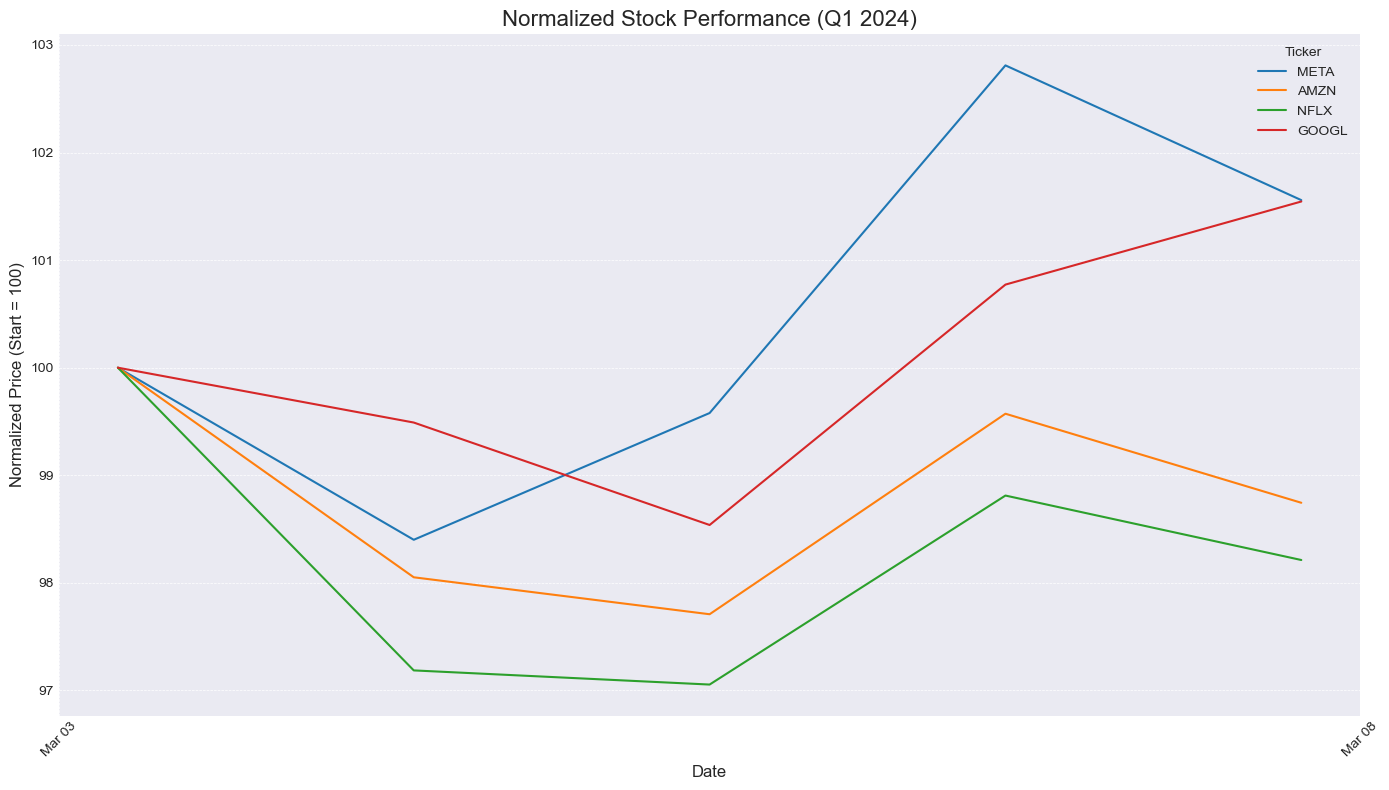

In [14]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Loop through each ticker's DataFrame in our dictionary
for ticker, df in stock_data.items():
    if not df.empty:
        # --- Normalize the closing price ---
        # We divide each day's close price by the very first day's close price
        # and multiply by 100. This makes all stocks start at a value of 100.
        normalized_close = (df['close'] / df['close'].iloc[0]) * 100

        ax.plot(df['timestamp'], normalized_close, label=ticker)

# --- Formatting the plot ---
ax.set_title('Normalized Stock Performance (Q1 2024)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Normalized Price (Start = 100)', fontsize=12)
ax.legend(title='Ticker', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve date formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14)) # Ticks every 14 days
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()